# Compare vertical wind magnitude with GEOS-FP data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cubedsphere as cs

# GEOS-FP wind

## Native

In [2]:
file = '~/gcdata/GEOS_0.25x0.3125.d/GEOS_FP/2015/07/GEOSFP.20150701.A3dyn.Native.nc'
ds_fp = xr.open_dataset(file)
wind_fp = ds_fp['OMEGA'].isel(time=0,lev=17).values.ravel()
wind_fp.shape

(830592,)

In [3]:
wind_fp.std(), wind_fp.mean()

(0.1911756842716264, 0.0015352323848945341)

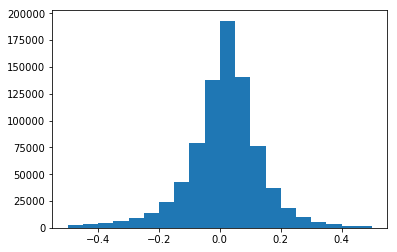

In [4]:
plt.hist(wind_fp,bins=20,range=[-0.5,0.5]);

## 4x5

In [5]:
file = '~/gcdata/GEOS_4x5/GEOS_FP/2015/07/GEOSFP.20150701.A3dyn.4x5.nc'
ds_fp = xr.open_dataset(file)
wind_fp = ds_fp['OMEGA'].isel(time=0,lev=17).values.ravel()
wind_fp.shape

(3312,)

In [6]:
wind_fp.std(), wind_fp.mean()  # wind standard deviation

(0.10366086823216925, 0.0021361049503374431)

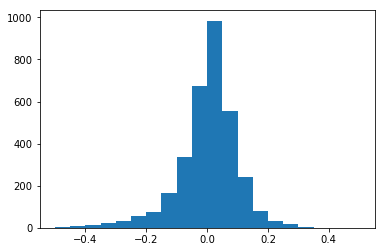

In [7]:
plt.hist(wind_fp,bins=20,range=[-0.5,0.5]);

# FV3 wind

## C48

In [8]:
Hres = 48
Vres = 20

maindir = "/n/home03/zhuangjw/seasasfs/fromPleiades/output_FV3/"
datadir = maindir + "C{0}/C{0}L{1}/".format(Hres,Vres)
datadir

'/n/home03/zhuangjw/seasasfs/fromPleiades/output_FV3/C48/C48L20/'

In [9]:
ds = cs.open_FV3data(datadir,"atmos_daily")

In [10]:
mask = ((ds['lat'] < 60) & (ds['lat'] > 30)).values.ravel()
wind = (ds['omega'].isel(time=-1, pfull=-6)).values.ravel()

In [11]:
wind.shape

(13824,)

In [12]:
wind_masked = wind[mask]
wind_masked.shape

(2948,)

In [13]:
wind_masked.std(), wind_masked.mean()

(0.090063236799638263, 0.0015719760217541364)

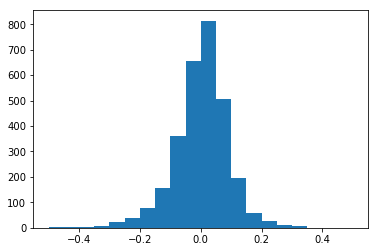

In [14]:
plt.hist(wind_masked,bins=20,range=[-0.5,0.5]);

## C384

In [15]:
Hres = 384
Vres = 20

maindir = "/n/home03/zhuangjw/seasasfs/fromPleiades/output_FV3/"
datadir = maindir + "C{0}/C{0}L{1}/".format(Hres,Vres)
ds = cs.open_FV3data(datadir,"atmos_daily")

In [16]:
mask = ((ds['lat'] < 60) & (ds['lat'] > 30)).values.ravel()
wind = (ds['omega'].isel(time=-1, pfull=-6)).values.ravel()
wind_masked = wind[mask]
wind_masked.shape

(188120,)

In [17]:
wind_masked.std(), wind_masked.mean()

(0.13453114097285324, 0.0012679055147427425)

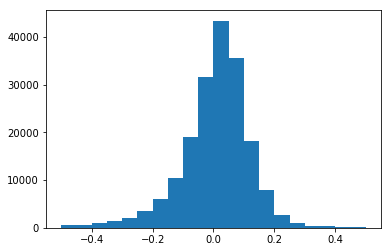

In [18]:
plt.hist(wind_masked,bins=20,range=[-0.5,0.5]);